In [1]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [63]:
os.putenv('SDL_VIDEODRIVER', 'fbcon')
os.environ["SDL_VIDEODRIVER"] = "dummy"

from ple.games import originalGame, nosemantics,nosimilarity,noaffordance,noobject

In [67]:
game = originalGame()

from ple import PLE

p = PLE(game, fps=30, display_screen=False,frame_skip=3, force_fps=False,add_noop_action=False)
p.init()

p.getActionSet()

[97, 100, 32, 119, 115]

game over!


/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


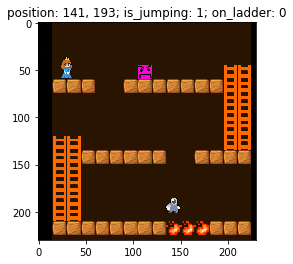

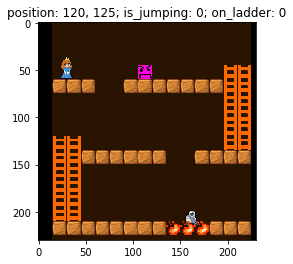

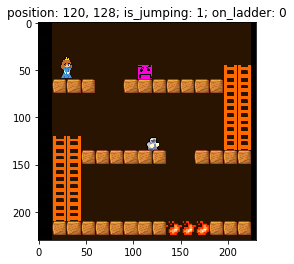

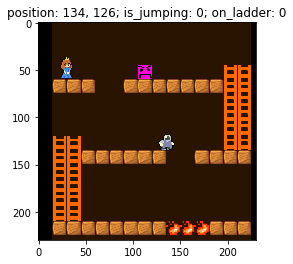

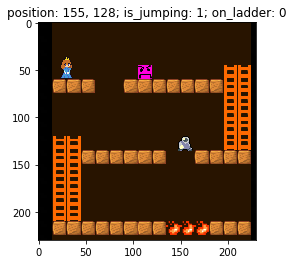

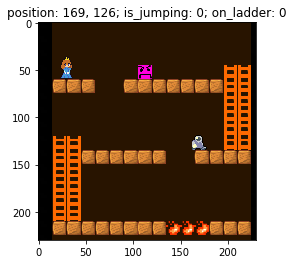

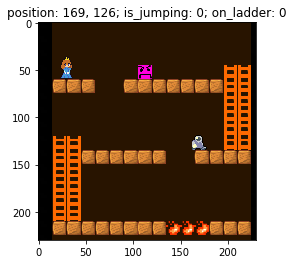

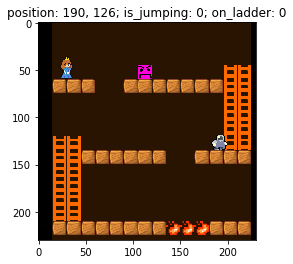

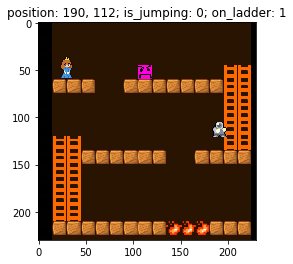

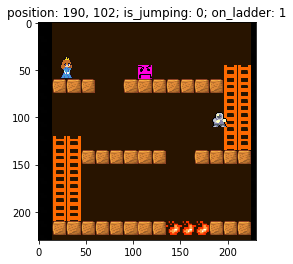

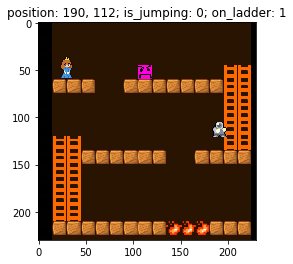

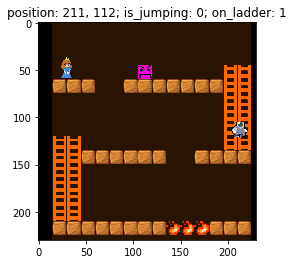

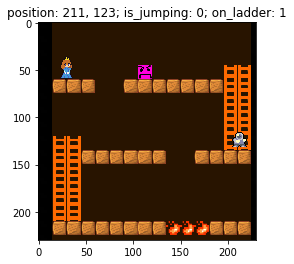

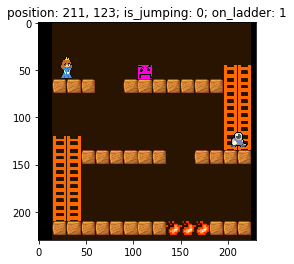

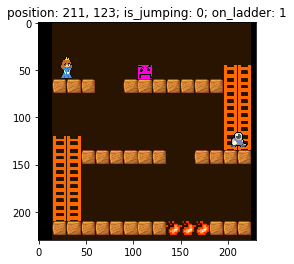

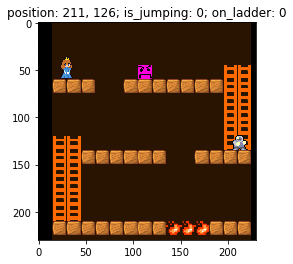

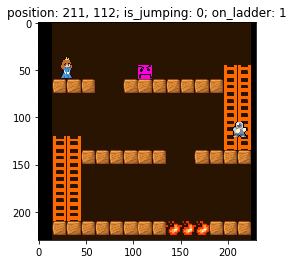

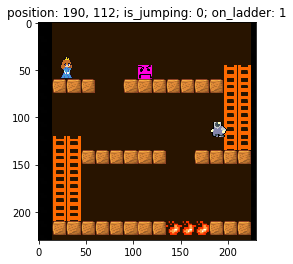

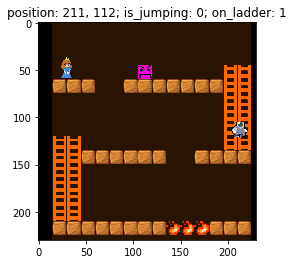

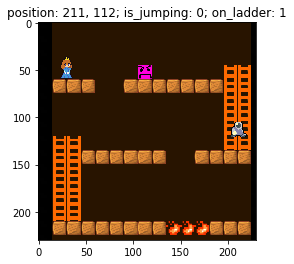

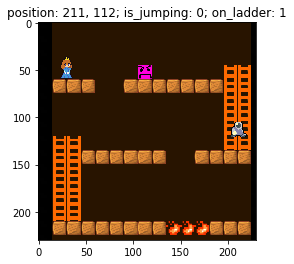

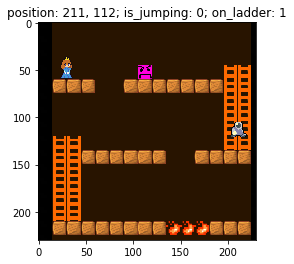

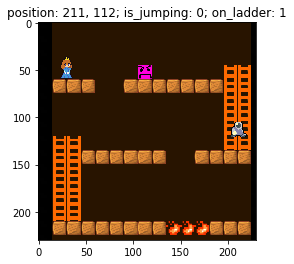

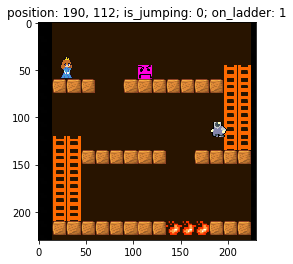

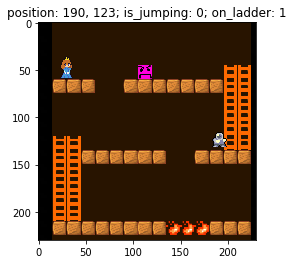

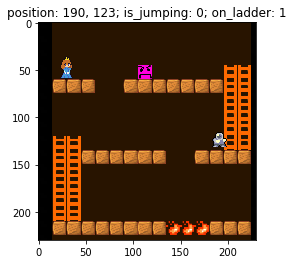

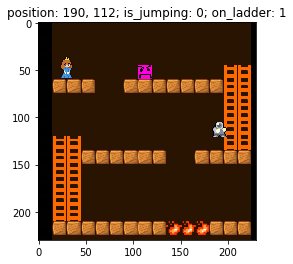

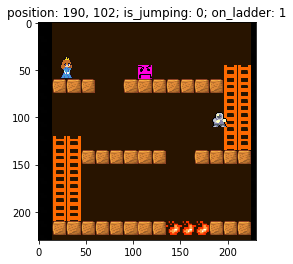

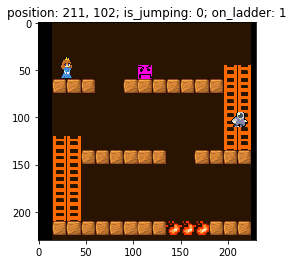

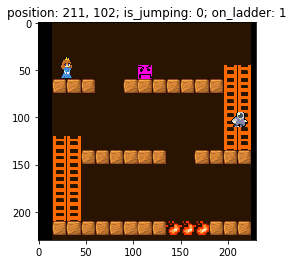

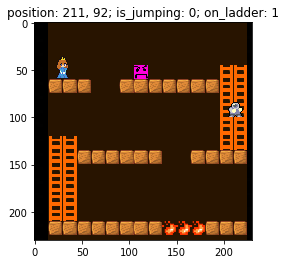

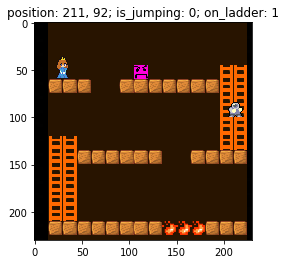

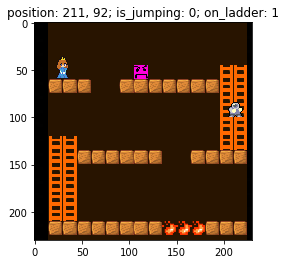

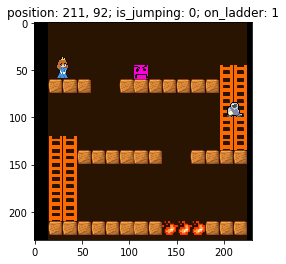

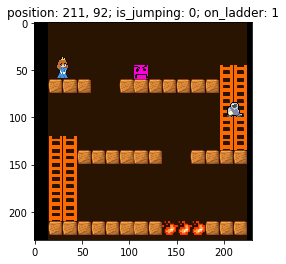

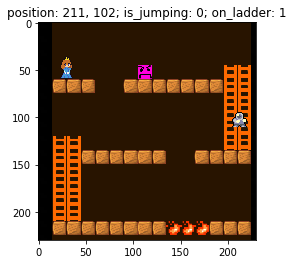

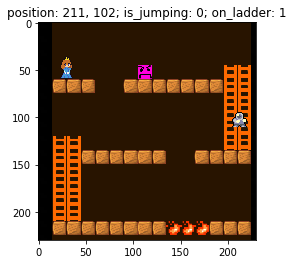

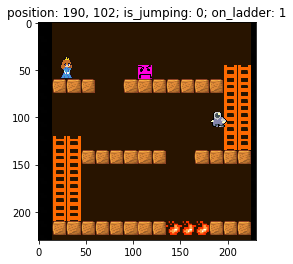

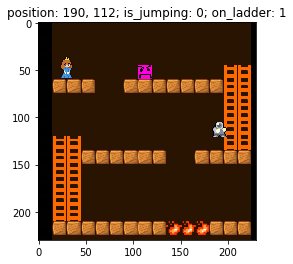

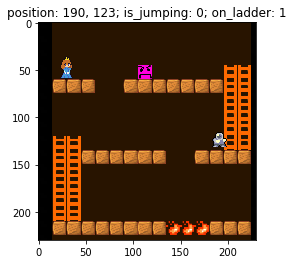

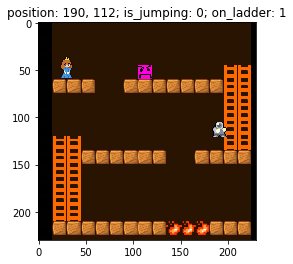

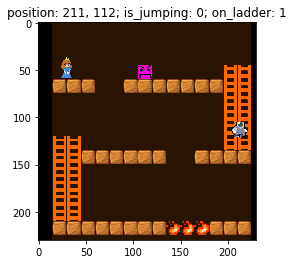

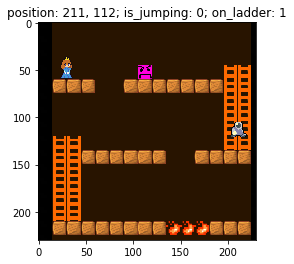

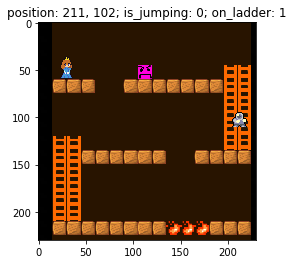

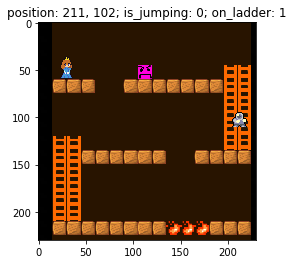

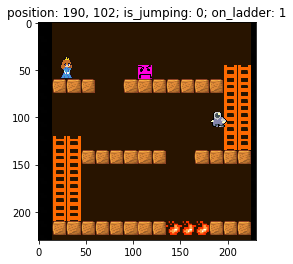

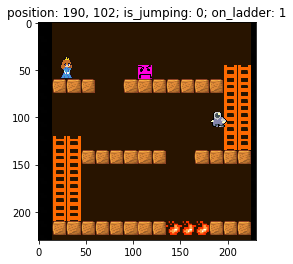

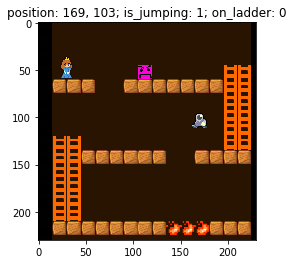

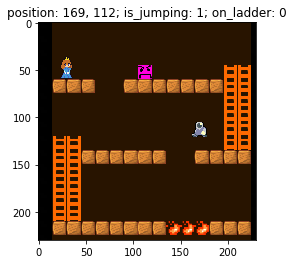

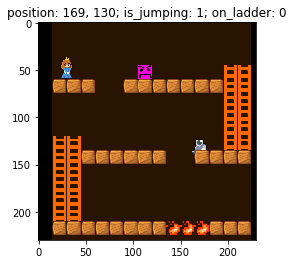

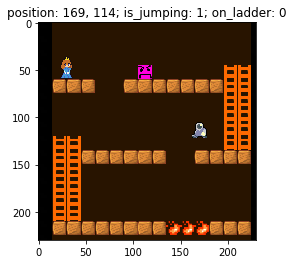

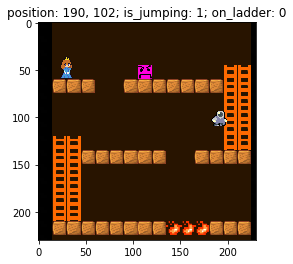

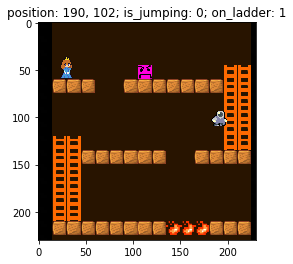

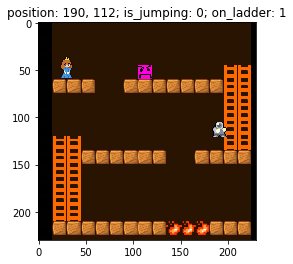

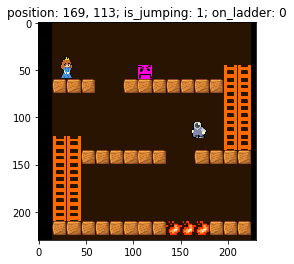

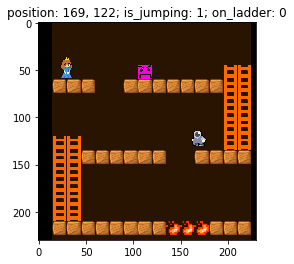

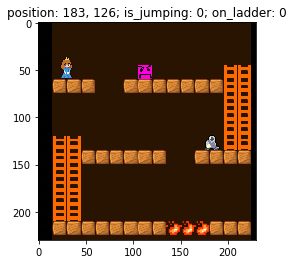

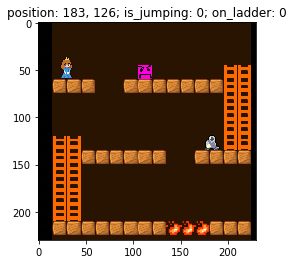

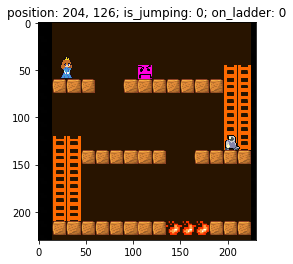

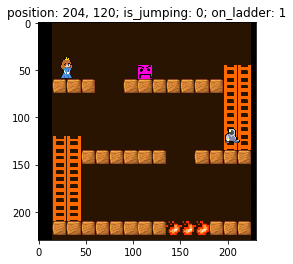

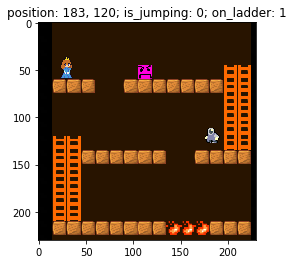

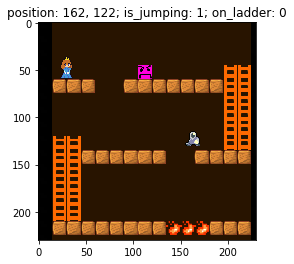

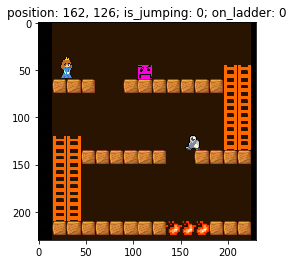

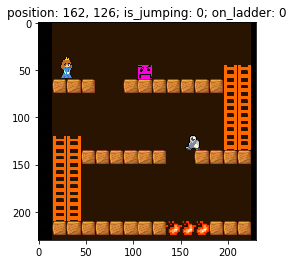

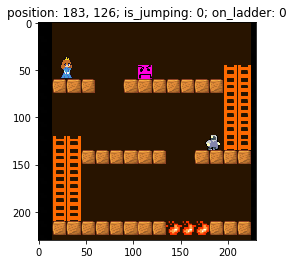

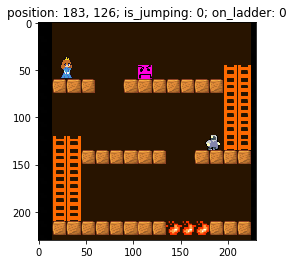

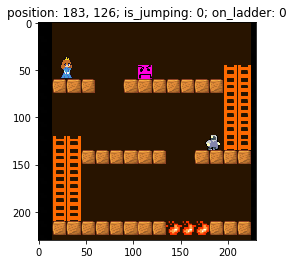

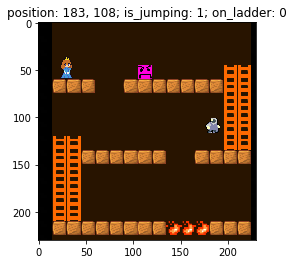

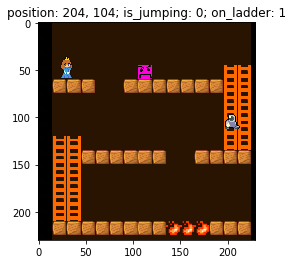

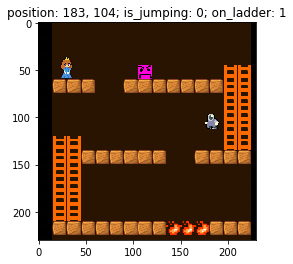

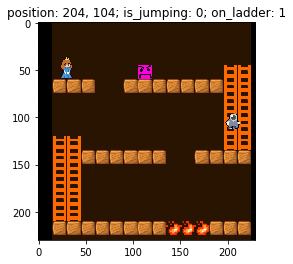

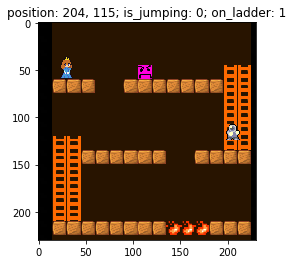

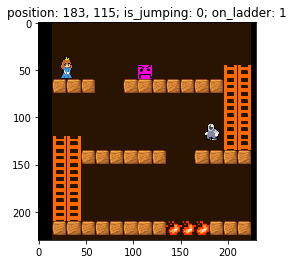

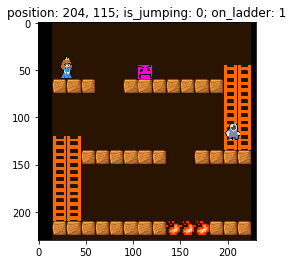

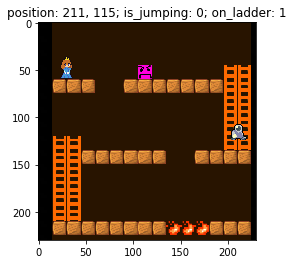

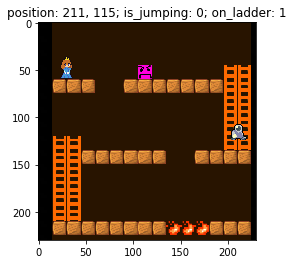

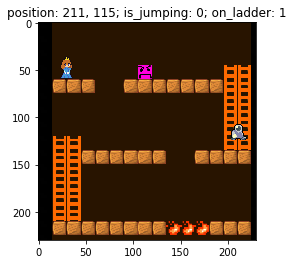

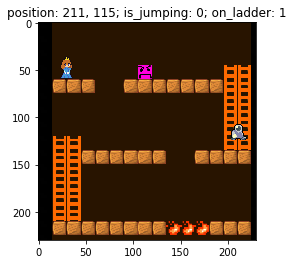

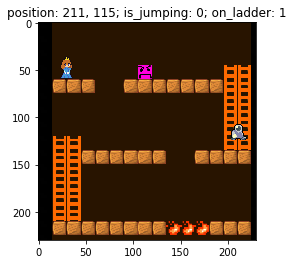

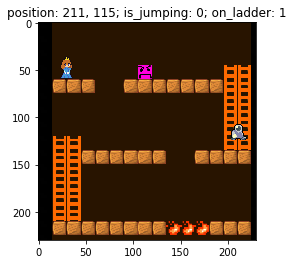

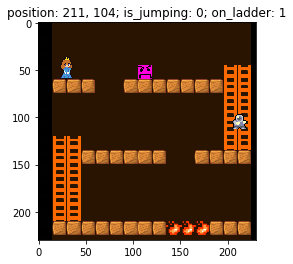

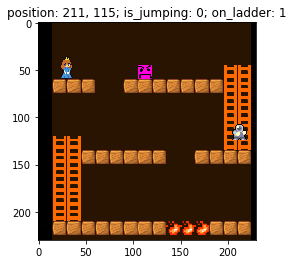

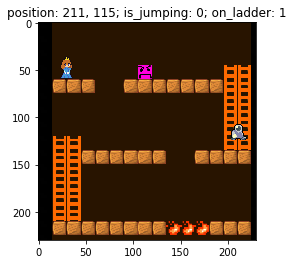

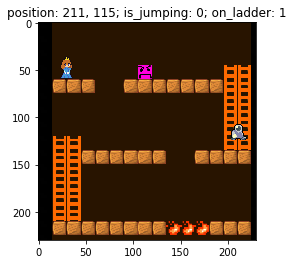

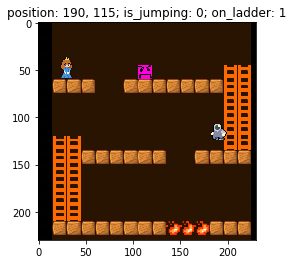

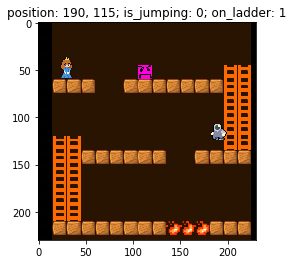

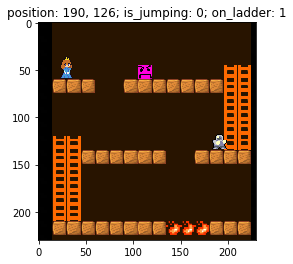

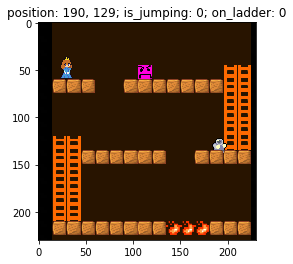

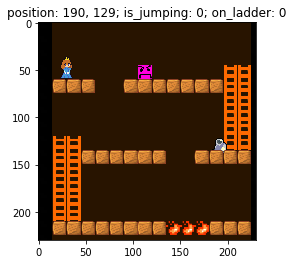

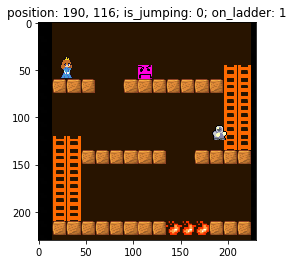

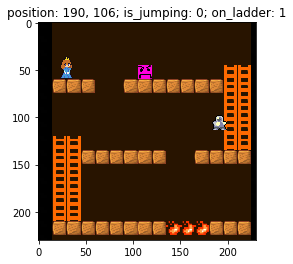

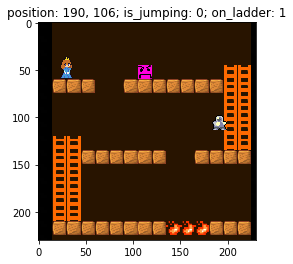

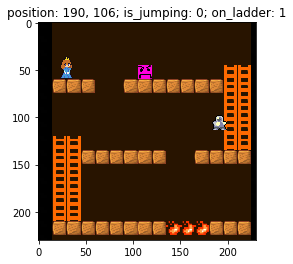

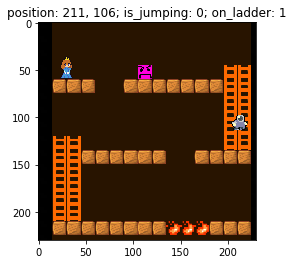

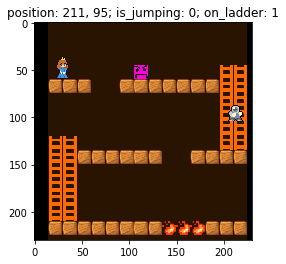

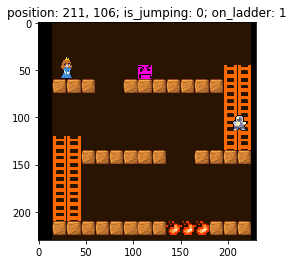

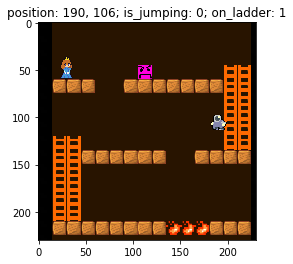

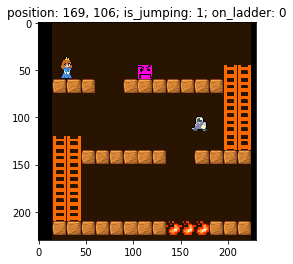

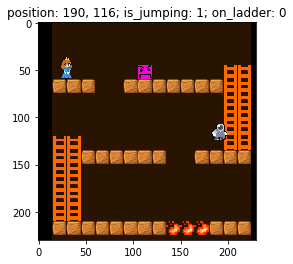

In [81]:
#zip([97, 100, 32, 119, 115, None],["left","right","jump","up ladder", "down"])

nb_frames = 100
frames_open = 100
reward = 0.0

p.reset_game()
actions = 13*[97] + 5*[119] + 6*[115] + 6*[100] + 30*[32]
for f in range(nb_frames):
    if p.game_over(): #check if the game is over
        print("game over!")
        p.reset_game()
        upd = np.random.randint(100)
        p.game.newGame.Players[0].updateY(-1*upd)
        
    
    player = p.game.newGame.Players[0]
    pos, isj, ol = player.getPosition(), player.isJumping, player.onLadder
    obs = p.getScreenRGB()
    obs = np.transpose(obs,axes=(1,0,2))
    if f != 0:
        plt.figure(f)
        plt.imshow(obs,origin="upper")
        plt.title("position: %.0f, %.0f; is_jumping: %i; on_ladder: %i"%(pos[0],pos[1],isj,ol))
    action = np.random.choice(p.getActionSet())#actions[f]#
    reward = p.act(action)

In [69]:
player = p.game.newGame.Players[0]


In [70]:
player.getPosition()

(106, 183.5)

In [71]:
player.isJumping

player.onLadder

0

In [77]:
player.update

Signature: player.updateWH(raw_image, direction, value, width, height)
Docstring: <no docstring>
File:      ~/Dropbox/projects/humanRL_prior_games/ple/games/originalgame/person.py
Type:      method


In [74]:
player.getPosition()

(106, 185.5)